## Notebook set up

### Import libraries

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from scipy.interpolate import griddata

from statsmodels.nonparametric.smoothers_lowess import lowess

### Create dataset

In [433]:
# Generate the Friedman1 dataset
X, y = make_friedman1(n_samples=5000, n_features=5, random_state=315)

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
y_series = pd.Series(y, name='label')

# Combine into a single DataFrame for easy exploration
df = X_df.copy()
df['label'] = y_series

# Display the first few rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,0.616679,0.279165,0.125676,0.315648,0.996900,16.091937
1,0.423093,0.112483,0.981730,0.719996,0.999457,18.328074
2,0.409812,0.596355,0.087318,0.646466,0.138363,17.508035
3,0.824479,0.906551,0.373458,0.400470,0.618359,14.544648
4,0.856326,0.250800,0.535109,0.944498,0.958171,20.507191


## Task 1: Train and evaluate a linear regression model

**Tasks**:

1. Split the data into training and testing sets using an 80-20 split. Use `random_state=315`.

2. Train a `LinearRegression` model on the training data.

3. Calculate and print the following metrics:
   - Training RMSE
   - Testing RMSE

4. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

**Hints**:

- Use `train_test_split()` with `test_size=0.2`
  - Example: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)`

- To calculate metrics:
  - First make predictions: `y_pred = model.predict(X_test)`
  - Then calculate: `rmse = root_mean_squared_error(y_test, y_pred)`

- To add a reference line to a plot:
  - `plt.plot([min, max], [min, max], 'k--', alpha=0.3)`

----------------------------------------------
Model Coefficients
[6.63333859 6.71974329 0.03614301 9.90233072 4.92565929]
----------------------------------------------

Training RMSE: 2.4359

Testing RMSE: 2.4420




C:\Users\jxbma\AppData\Local\Temp\ipykernel_17360\4158608169.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


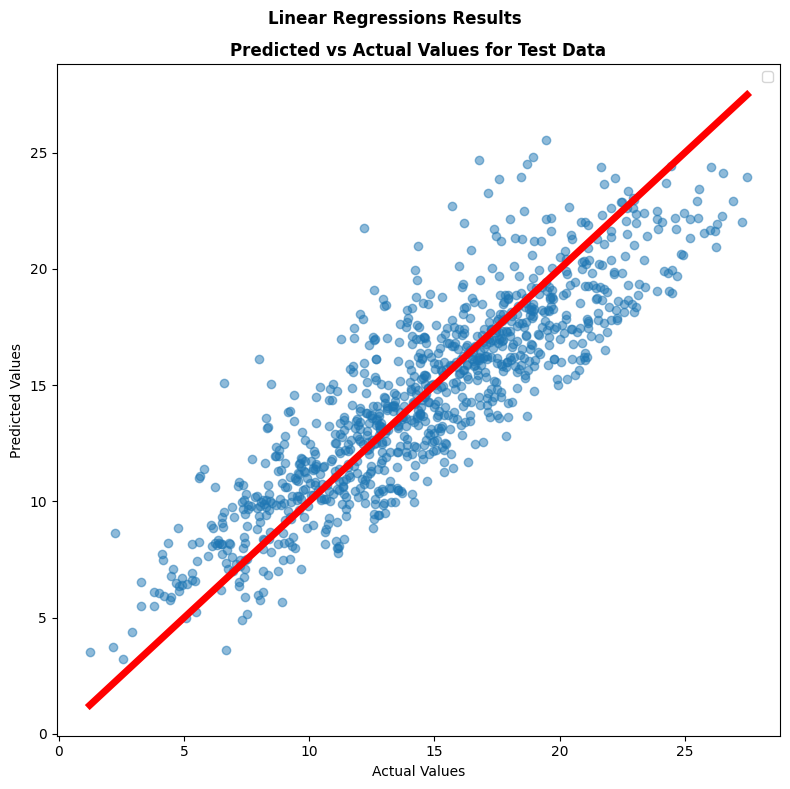

Training RMSE: 2.4359

Testing RMSE: 2.4420


In [434]:
#
# Split Data into Training/Test => 80/20
#
# print(X)
# print()
# print(y)
# print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# print('X_train')
# print(X_train)
# print()

# print('X_test')
# print(X_test)
# print()

# print('y_train')
# print(y_train)
# print()

# print('y_test')
# print(y_test)

linear_regression_model = LinearRegression()

fit_result = linear_regression_model.fit( 
                                            X_train,
                                            y_train
                                        )

print('----------------------------------------------')
print('Model Coefficients')
print(fit_result.coef_)
print('----------------------------------------------')
print()

train_predictions = linear_regression_model.predict(X_train)
train_rmse = root_mean_squared_error(y_train, train_predictions)
print(f'Training RMSE: {train_rmse:.4f}')
print()

test_predictions = linear_regression_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, test_predictions)
print(f'Testing RMSE: {test_rmse:.4f}')
print()
print()

plt.figure(figsize=(8,8))
plt.suptitle('Linear Regressions Results', fontweight='bold')
plt.scatter(y_test, test_predictions, alpha=0.5)

min_val = min(y_test.min(), test_predictions.min())
max_val = max(y_test.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r', linewidth=5)

# Labels
plt.title('Predicted vs Actual Values for Test Data', fontweight='bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   


print(f'Training RMSE: {train_rmse:.4f}')
print()
print(f'Testing RMSE: {test_rmse:.4f}')

## Task 2: Train and evaluate a decision tree model

**Tasks**:

1. Train the decision tree model (provided below) on the training data from Task 1.

2. Calculate and print the following metrics for the decision tree:
   - Training RMSE
   - Testing RMSE

3. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

4. Compare the decision tree metrics to the linear regression metrics from Task 1:
   - Which model has lower testing RMSE?
   - How do the two models differ in their predictions?

**Hints**:

- Use the same `X_train`, `X_test`, `y_train`, `y_test` from Task 1

----------------------------------------------
----------------------------------------------



Training RMSE: 1.7197

Testing RMSE: 2.0901




C:\Users\jxbma\AppData\Local\Temp\ipykernel_17360\2692511612.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


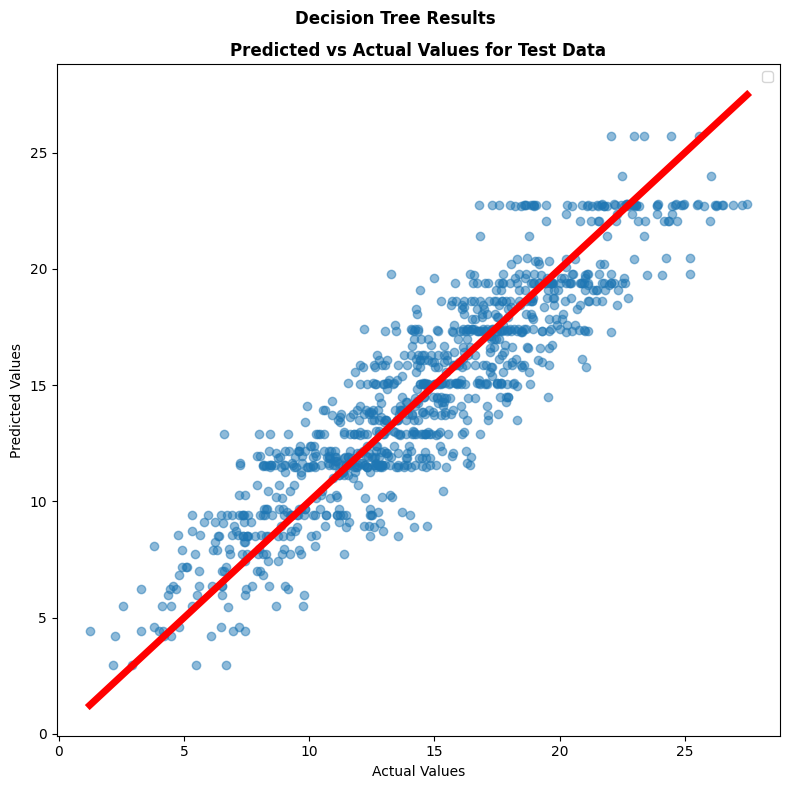

------------------------------------------------
Results Comparing Linear Regression vs Decision Tree
------------------------------------------------

Linear Regression Training RMSE: 2.4359
Decision Tree Training RMSE: 1.7197

Linear Regression Test RMSE: 2.4420
Decision Tree Test RMSE: 2.0901

Linear Regression Test/Train RMSE values close
Decision Tree Test/Train RMSE results better than Linear Regression
------------------------------------------------


In [435]:
# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_split=30, min_samples_leaf=15, random_state=315)
dt_fit_result = dt_model.fit(X_train, y_train)

print('----------------------------------------------')
print('----------------------------------------------')
print()

dt_train_predictions = dt_model.predict(X_train)
dt_train_rmse = root_mean_squared_error(y_train, dt_train_predictions)
print(f'Training RMSE: {dt_train_rmse:.4f}')
print()

dt_test_predictions = dt_model.predict(X_test)
dt_test_rmse = root_mean_squared_error(y_test, dt_test_predictions)
print(f'Testing RMSE: {dt_test_rmse:.4f}')
print()
print()

plt.figure(figsize=(8,8))
plt.suptitle('Decision Tree Results', fontweight='bold')
plt.scatter(y_test, dt_test_predictions, alpha=0.5)

dt_min_val = min(y_test.min(), dt_test_predictions.min())
dt_max_val = max(y_test.max(), dt_test_predictions.max())
plt.plot([dt_min_val, dt_max_val], [dt_min_val, dt_max_val], 'r', linewidth=5)

# Labels
plt.title('Predicted vs Actual Values for Test Data', fontweight='bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   

print('------------------------------------------------')
print('Results Comparing Linear Regression vs Decision Tree')
print('------------------------------------------------')
print()
print(f'Linear Regression Training RMSE: {train_rmse:.4f}')
print(f'Decision Tree Training RMSE: {dt_train_rmse:.4f}')
print()
print(f'Linear Regression Test RMSE: {test_rmse:.4f}')
print(f'Decision Tree Test RMSE: {dt_test_rmse:.4f}')
print()
print('Linear Regression Test/Train RMSE values close')
print('Decision Tree Test/Train RMSE results better than Linear Regression')
print('------------------------------------------------')


## Task 3: Investigate why the models perform differently

**Tasks**:

1. Create visualizations to understand the relationship between features and label:
   - For features 0 and 1: Create a 2D scatter plot colored by the label value (use a colormap)
   - For features 2, 3, and 4: Create individual scatter plots vs. label

2. Based on your plots:
   - Identify which relationships are linear
   - Identify which relationships are non-linear
   - Explain how this affects each model's performance

3. (Optional) Try to improve the linear regression model by adding polynomial features for the non-linear relationships. Does this improve performance?

**Hints**:

- For a 2D scatter plot with color mapping:
  - `plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')`
  - `plt.colorbar(label='Label')`

- The decision tree can capture non-linear relationships by splitting the feature space, while linear regression assumes linear relationships

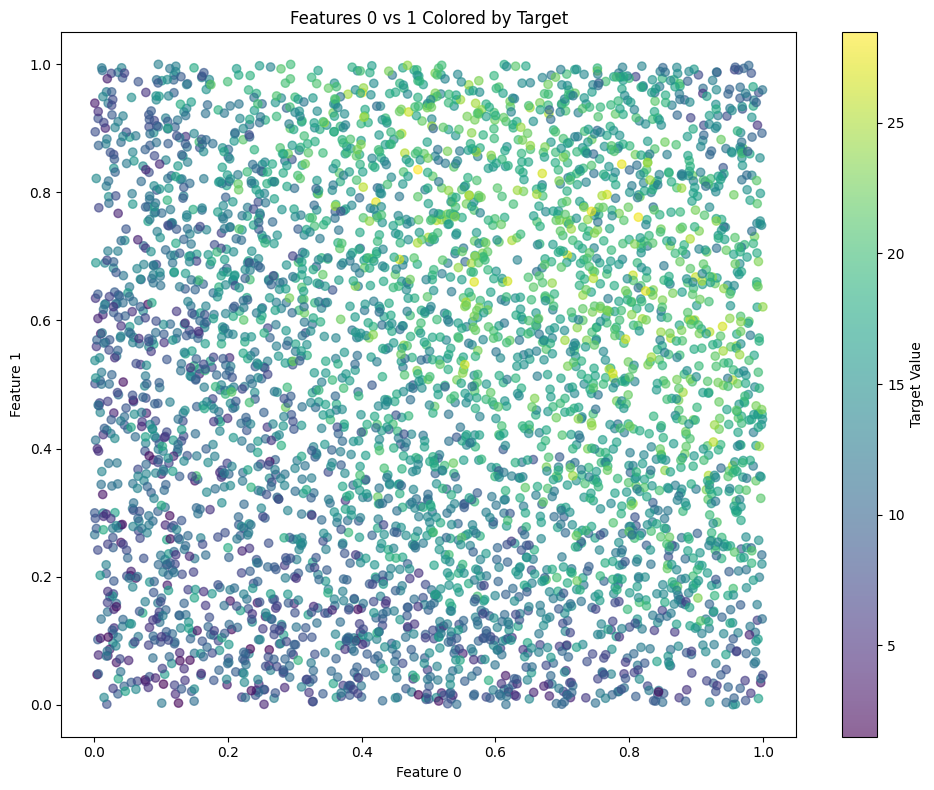

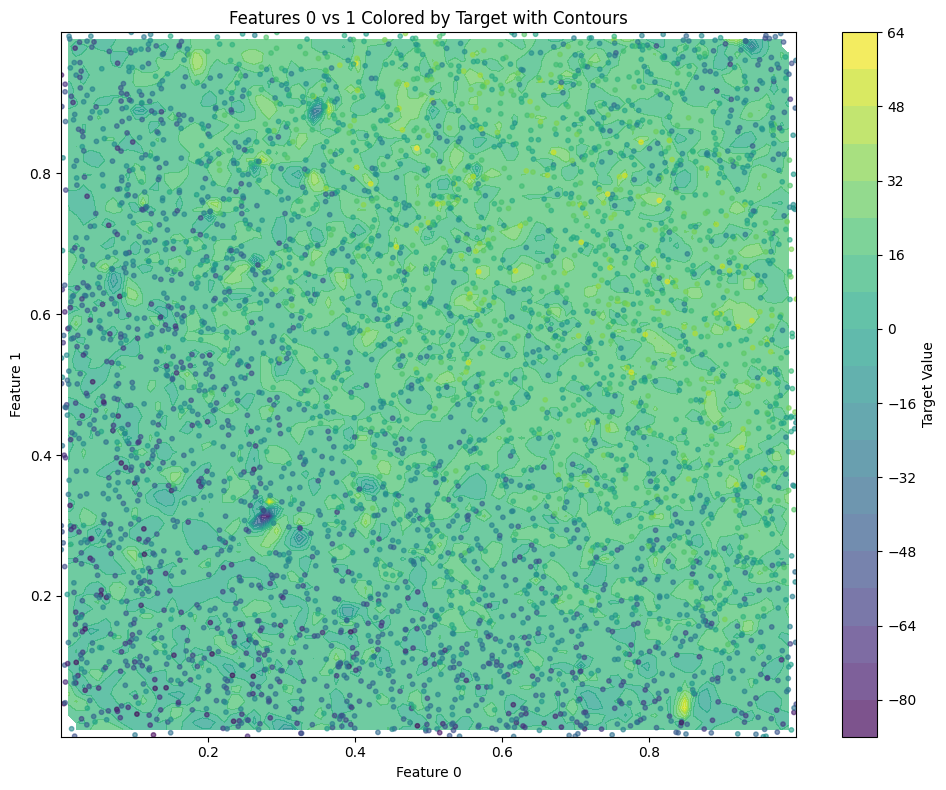

C:\Users\jxbma\AppData\Local\Temp\ipykernel_17360\2923249603.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i_plot].scatter(X_train[:, index], y_train, cmap='viridis', alpha=0.3)


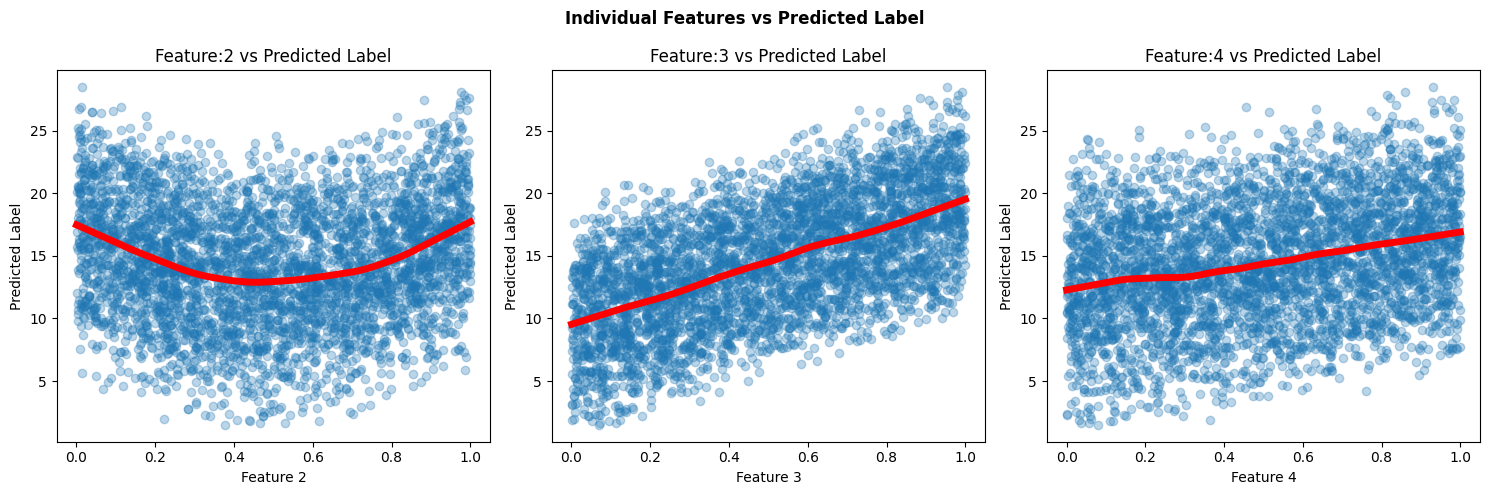


--------------------------------------
Scatter Plot Results
Feature 0/Feature 1 vs Label ==> Non-Linear Relationship
Feature 2 vs Label ==> Non-Linear Relationship
Feature 3 vs Label ==> Linear Relationship
Feature 4 vs Label ==> Linear Relationship

--------------------------------------


In [436]:
#
# Create a Scatter plot to help highlight relationship between Features 0,1 and Label
#

plt.figure(figsize=(10, 8))
#plt.colorbar(contour, label='Target Value')

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Target Value')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Features 0 vs 1 Colored by Target')
plt.tight_layout()
plt.show()
print()
print()

#
# Create a Contour plot to help highlight relationship
#
# Create grid
xi = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
yi = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate target values onto grid
zi = griddata((X_train[:, 0], X_train[:, 1]), y_train, (xi, yi), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(xi, yi, zi, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Target Value')

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=10)
#plt.colorbar(scatter, label='Target Value')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Features 0 vs 1 Colored by Target with Contours')
plt.tight_layout()
plt.show()
print()
print()

n_cols = 3
n_rows = 1

# I need a 3X3 plot to display 10 histograms
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5))
axes = axes.flatten()

plt.suptitle('Individual Features vs Predicted Label', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at top

#Iterate over each numeric column and plot a historgram
i_plot = 0
for index in range(2,5):
    axes[i_plot].scatter(X_train[:, index], y_train, cmap='viridis', alpha=0.3)
    axes[i_plot].set_xlabel(f'Feature {index}')
    axes[i_plot].set_ylabel('Predicted Label')
    axes[i_plot].set_title(f'Feature:{index} vs Predicted Label')

    # lowess - Locally Weighted Scatter Plot Smoothing
    smoothed = lowess(y_train, X_train[:, index], frac=0.3)
    axes[i_plot].plot(smoothed[:, 0], smoothed[:, 1], 'r-', linewidth=5)
    i_plot += 1

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   

print()
print('--------------------------------------')
print('Scatter Plot Results')
print('Feature 0/Feature 1 vs Label ==> Non-Linear Relationship')
print('Feature 2 vs Label ==> Non-Linear Relationship')
print('Feature 3 vs Label ==> Linear Relationship')
print('Feature 4 vs Label ==> Linear Relationship')
print()
print('--------------------------------------')

### **Improve the linear regression model by adding polynomial features for the non-linear relationships** ###

----------------------------------------------
Model Coefficients
[  6.84340476   6.83621055 -20.05184505   9.91274645   4.9125899
  20.10605074  -0.27906486]
----------------------------------------------

Training RMSE: 1.9241

Testing RMSE: 1.8625




C:\Users\jxbma\AppData\Local\Temp\ipykernel_17360\4049579739.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


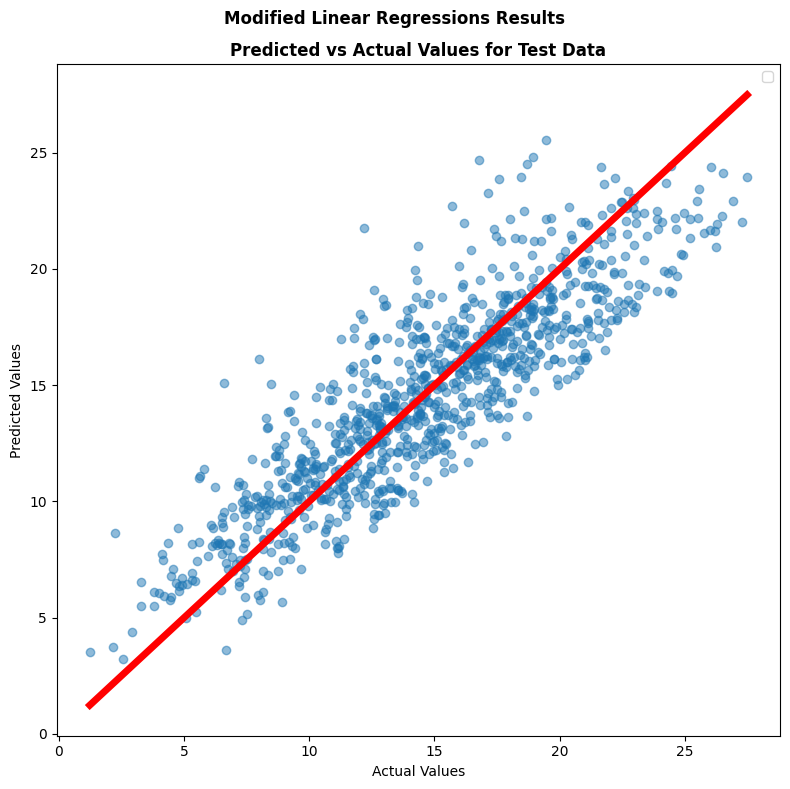

Transformed Training RMSE: 1.9241

Transformed Testing RMSE: 1.8625


------------------------------------------------
Results Comparing Linear Regression vs Decision Tree
------------------------------------------------

Linear Regression Training RMSE: 2.4359
Transformed Training RMSE: 1.9241
Decision Tree Training RMSE: 1.7197

Linear Regression Test RMSE: 2.4420
Transformed Testing RMSE: 1.8625
Decision Tree Test RMSE: 2.0901

------------------------------------------------


In [437]:

# Create enhanced feature sets
X_train_enhanced = np.column_stack([
                                    X_train,
                                    X_train[:, 2] ** 2,
                                    X_train[:, 0] * X_train[:, 1]
                                ])

X_test_enhanced = np.column_stack([
                                    X_test,
                                    X_test[:, 2] ** 2,
                                    X_test[:, 0] * X_test[:, 1]
                                ])


fit_result = linear_regression_model.fit(X_train_enhanced,y_train)

print('----------------------------------------------')
print('Model Coefficients')
print(fit_result.coef_)
print('----------------------------------------------')
print()

transformed_train_predictions = linear_regression_model.predict(X_train_enhanced)
transformed_train_rmse = root_mean_squared_error(y_train, transformed_train_predictions)
print(f'Training RMSE: {transformed_train_rmse:.4f}')
print()

transformed_test_predictions = linear_regression_model.predict(X_test_enhanced)
transformed_test_rmse = root_mean_squared_error(y_test, transformed_test_predictions)
print(f'Testing RMSE: {transformed_test_rmse:.4f}')
print()
print()

plt.figure(figsize=(8,8))
plt.suptitle('Modified Linear Regressions Results', fontweight='bold')
plt.scatter(y_test, test_predictions, alpha=0.5)

min_val = min(y_test.min(), test_predictions.min())
max_val = max(y_test.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r', linewidth=5)

# Labels
plt.title('Predicted vs Actual Values for Test Data', fontweight='bold')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   


print(f'Transformed Training RMSE: {transformed_train_rmse:.4f}')
print()
print(f'Transformed Testing RMSE: {transformed_test_rmse:.4f}')

print()
print()
print('------------------------------------------------')
print('Results Comparing Linear Regression vs Decision Tree')
print('------------------------------------------------')
print()
print(f'Linear Regression Training RMSE: {train_rmse:.4f}')
print(f'Transformed Training RMSE: {transformed_train_rmse:.4f}')
print(f'Decision Tree Training RMSE: {dt_train_rmse:.4f}')
print()
print(f'Linear Regression Test RMSE: {test_rmse:.4f}')
print(f'Transformed Testing RMSE: {transformed_test_rmse:.4f}')
print(f'Decision Tree Test RMSE: {dt_test_rmse:.4f}')
print()
print('------------------------------------------------')

## Reflection

Based on your analysis, answer the following questions:

1. **Model performance**: Which model performed better and why?

2. **Linear assumptions**: What happens when you apply linear regression to non-linear data?

3. **Model complexity**: What are the trade-offs between simpler models (linear regression) and more complex models (decision trees)?

4. **Real-world implications**: In what situations would you prefer:
   - A linear regression model?
   - A decision tree model?
   - Consider factors like interpretability, performance, and data characteristics.